# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 10

Group Members:
- Clement Nathanael Lim (18222032)
- Mattheuw Suciadi Wijaya (18222048)
- Hartanto Luwis (18222064)
- Farah Aulia (18222096)

## Import Libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from typing import Any
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Import Dataset

In [4]:
df = pd.read_csv('https://drive.google.com/uc?id=1GZlJN03cI4o42N-EOCu_buY9t6ybSiYd')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [24]:
# Membagi data 80 20, 80% training 20% validation

original_train_set = df.copy()

X = original_train_set.drop(columns=['label'])  # Fitur
y = original_train_set['label']  # Target/label

# Split data menjadi train_set dan val_set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.02, random_state=42, stratify=y)

print(f"Ukuran training set: {X_train.shape[0]}")
print(f"Ukuran validation set: {X_val.shape[0]}")


Ukuran training set: 137595
Ukuran validation set: 2809


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [6]:
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_strategy='median', categorical_strategy='most_frequent'):
        self.numerical_strategy = numerical_strategy
        self.categorical_strategy = categorical_strategy

    def fit(self, X, y=None):
        # Kolom yang masih ada di X
        current_numerical = [col for col in numerical_columns if col in X.columns]
        current_categorical = [col for col in categorical_columns if col in X.columns]

        self.num_imputer_ = SimpleImputer(strategy=self.numerical_strategy)
        self.cat_imputer_ = SimpleImputer(strategy=self.categorical_strategy)

        self.num_imputer_.fit(X[current_numerical])
        self.cat_imputer_.fit(X[current_categorical])
        return self

    def transform(self, X):
        X = X.copy()
        current_numerical = [col for col in numerical_columns if col in X.columns]
        current_categorical = [col for col in categorical_columns if col in X.columns]

        X[current_numerical] = self.num_imputer_.transform(X[current_numerical])
        X[current_categorical] = self.cat_imputer_.transform(X[current_categorical])
        return X

Kode di atas adalah handling missing values sederhana dengan menggunakan mean untuk numerical dan most frequent untuk kategorical.Hal ini dilakukan karena teknik imputation dengan Fancyimpute seperti knn menggunakan resource yang besar dan tidak bisa dijalankan.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [7]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method='IQR', threshold=1.5):
        self.method = method
        self.threshold = threshold

    def fit(self, X, y=None):
        self.lower_bounds_ = {}
        self.upper_bounds_ = {}
        self.medians_ = {}
        current_numerical = [col for col in numerical_columns if col in X.columns]

        for column in current_numerical:
            q1 = X[column].quantile(0.25)
            q3 = X[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - self.threshold * iqr
            upper_bound = q3 + self.threshold * iqr
            median = X[column].median()
            self.lower_bounds_[column] = lower_bound
            self.upper_bounds_[column] = upper_bound
            self.medians_[column] = median
        return self

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [8]:
class DuplicateRemover(BaseEstimator, TransformerMixin):
    def __init__(self, axis=0):
        self.axis = axis

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            if self.axis == 0:
                X_cleaned = X.drop_duplicates()  # Hapus baris duplikat
            elif self.axis == 1:
                X_cleaned = X.T.drop_duplicates().T  # Hapus kolom duplikat
            else:
                raise ValueError("Axis harus 0 (baris) atau 1 (kolom).")
        elif isinstance(X, np.ndarray):
            if self.axis == 0:
                X_cleaned = np.unique(X, axis=0)  # Hapus baris duplikat
            elif self.axis == 1:
                X_cleaned = np.unique(X.T, axis=0).T  # Hapus kolom duplikat
            else:
                raise ValueError("Axis harus 0 (baris) atau 1 (kolom).")
        else:
            raise ValueError("Input harus berupa pd.DataFrame atau np.ndarray.")

        return X_cleaned

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [9]:
# FeatureSelector class untuk seleksi fitur
class FeatureSelector:
    def __init__(self, numerical_corr_threshold=0.2, categorical_cramers_v_threshold=0.2):
        self.numerical_corr_threshold = numerical_corr_threshold
        self.categorical_cramers_v_threshold = categorical_cramers_v_threshold
        self.selected_features = []

    def fit(self, X, y):
        # Seleksi fitur numerik berdasarkan korelasi dengan target
        numerical_features = [col for col in numerical_columns if col in X.columns]
        numerical_corr = X[numerical_features].corrwith(y).abs()
        selected_numerical = numerical_corr[numerical_corr >= self.numerical_corr_threshold].index.tolist()

        # Seleksi fitur kategorikal berdasarkan Cramer's V dengan target
        categorical_features = [col for col in categorical_columns if col in X.columns]
        selected_categorical = [
            col for col in categorical_features
            if self._calculate_cramers_v(X[col], y) >= self.categorical_cramers_v_threshold
        ]

        # Gabungkan fitur numerik dan kategorikal terpilih
        self.selected_features = selected_numerical + selected_categorical

        # Jika fitur yang terpilih lebih dari 7, pilih yang paling penting berdasarkan skor seleksi
        if len(self.selected_features) > 7:
            top_numerical = numerical_corr[numerical_corr.index.isin(selected_numerical)].nlargest(3).index.tolist()
            top_categorical = selected_categorical[:4]
            self.selected_features = top_numerical + top_categorical

        return self

    def _calculate_cramers_v(self, x, y):
        contingency_table = pd.crosstab(x, y)
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        r, k = contingency_table.shape
        return np.sqrt(chi2 / (n * (min(r, k) - 1)))

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [10]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='standardization'):
        self.scaling_method = scaling_method

    def fit(self, X, y=None):
        if self.scaling_method == 'minmax':
            self.scaler_ = MinMaxScaler()
        elif self.scaling_method == 'standardization':
            self.scaler_ = StandardScaler()
        elif self.scaling_method == 'robust':
            self.scaler_ = RobustScaler()
        else:
            raise ValueError(f"Scaling method {self.scaling_method} tidak dikenali.")

        self.scaler_.fit(X)
        return self

    def transform(self, X):
        return self.scaler_.transform(X)

    def get_feature_names_out(self, input_features=None):
        return input_features


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [11]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        return self.encoder.transform(X)


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [25]:
#KAMUS
numerical_columns = ['URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
                      'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
                      'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
                      'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
                      'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS',
                      'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
categorical_columns = [ 'TLD', 'Domain', 'IsResponsive', 'Robots', 'NoOfURLRedirect', 'HasHiddenFields', 'HasPasswordField',
                       'Pay', 'URL', 'HasSubmitButton', 'Title', 'Crypto', 'HasObfuscation', 'Bank', 'NoOfSelfRedirect',
                        'HasExternalFormSubmit', 'IsHTTPS', 'HasCopyrightInfo', 'HasTitle', 'FILENAME', 'HasSocialNet',
                        'HasFavicon', 'HasDescription', 'IsDomainIP']
# Identifikasi kolom biner
binary_columns = [
    "IsDomainIP", "HasObfuscation", "IsHTTPS", "HasTitle",
    "HasFavicon", "Robots", "IsResponsive", "HasDescription", "NoOfURLRedirect", "NoOfSelfRedirect",
    "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
    "HasHiddenFields", "HasPasswordField", "Bank", "Pay",
    "Crypto", "HasCopyrightInfo",
]

# Identifikasi kolom kategorikal non-biner
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]


In [13]:
# Tentukan kolom numerik dan kategorikal
numerical_columns = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

# 1. Inisialisasi dan fit feature selector
selector = FeatureSelector(numerical_corr_threshold=0.2, categorical_cramers_v_threshold=0.3)
selector.fit(X, y)

# 2. Menampilkan 7 fitur terbaik yang terpilih
print("Fitur terpilih: ", selector.selected_features)

Fitur terpilih:  ['IsHTTPS', 'HasTitle', 'DegitRatioInURL', 'FILENAME', 'URL', 'Domain', 'TLD']


In [26]:
#Fitur yang dipilih
# numerical_columns = ['DegitRatioInURL', 'SpacialCharRatioInURL', 'NoOfOtherSpecialCharsInURL', 'DomainTitleMatchScore', 'CharContinuationRate', 'URLCharProb']
categorical_columns = ['IsHTTPS', 'HasTitle', 'HasSocialNet', 'HasCopyrightInfo']


In [27]:

# 1. Definisikan ColumnTransformer untuk menangani preprocessing numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai yang hilang dengan rata-rata
            ('scaler',StandardScaler())  # Normalisasi fitur numerik
        ]), numerical_columns),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang dengan modus
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encoding kategorikal
        ]), categorical_columns)
    ])

# 2. Buat pipeline untuk preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# 3. Fit pipeline pada data pelatihan (X_train)
pipeline.fit(X_train)

# 4. Transformasi data pelatihan
X_train_transformed = pipeline.transform(X_train)

# Pastikan data pelatihan berupa DataFrame dengan nama kolom yang sesuai
X_train_transformed = pd.DataFrame(X_train_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())


# 6. Transformasi data validasi
X_val_transformed = pipeline.transform(X_val)
X_val_transformed = pd.DataFrame(X_val_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())


# Pastikan semua kolom dalam X_val_transformed adalah numerik
X_val_transformed = X_val_transformed.apply(pd.to_numeric, errors='coerce')


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## Save and Load

In [16]:
class SaveModelLoader:
    def save(model, filename):
        filepath = "pkl/" + filename
        try:
            with open(filepath, 'wb') as file:
                pickle.dump(model, file)
            print(f"Model berhasil disimpan di {filepath}")
        except Exception as e:
            print(f"Error menyimpan model ke {filepath}: {e}")
    def load(filename: str) -> Any:
        filepath = "pkl/" + filename
        try:
            with open(filepath, 'rb') as file:
                model = pickle.load(file)
            print(f"Model berhasil di load dari {filepath}")
            return model
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except Exception as e:
            print(f"Error loading model dari {filepath}: {e}")


## A. KNN

In [17]:
# IMPLEMENTASI KNN FROM SCRATCH

# Sumber : https://www.kaggle.com/code/spoorthi91/knn-using-euclidean-distance-from-scratch
# Sumber : https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
# Sumber : https://medium.com/@amirm.lavasani/classic-machine-learning-in-python-k-nearest-neighbors-knn-a06fbfaaf80a


# Mendefinisikan perhitungan jarak
import numpy as np
from collections import Counter

# Mendefinisikan perhitungan jarak
class KNNSearch:

    def __init__(self, k=3, metric="euclidean", p=3):
        self.k = k
        self.metric = metric
        self.p = p  # Default p for Minkowski distance

    def Euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_dist(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def minkowski_dist(self, x1, x2):
        return np.power(np.sum(np.abs(x1 - x2) ** self.p), 1 / self.p)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def hitung_jarak(self, x1, x2):
        if self.metric == 'euclidean':
            return self.Euclidean_dist(x1, x2)
        elif self.metric == 'manhattan':
            return self.manhattan_dist(x1, x2)
        elif self.metric == 'minkowski':
            return self.minkowski_dist(x1, x2)
        else:
            raise ValueError(f"Metrik tak valid: {self.metric}")

    def _get_neighbors(self, x_test):
        distances = []
        for i, x_train in enumerate(self.X_train):
            distance = self.hitung_jarak(x_train, x_test)
            distances.append((distance, self.y_train[i]))

        # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
        distances.sort(key=lambda x: x[0])
        neighbors = [label for _, label in distances[:self.k]]
        return neighbors

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            neighbors = self._get_neighbors(x_test)
            most_common = Counter(neighbors).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

In [18]:
class KNNWithScikitLearn:
    def __init__(self, n_neighbors, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p
        self.model = None

    def fit(self, X_train, y_train):
        self.model = KNeighborsClassifier(n_neighbors=self.n_neighbors, metric=self.metric, p=self.p)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

def test_knn(X_train, X_val, y_train, y_val, n_neighbors=5):
    metrics = ['euclidean', 'manhattan', 'minkowski']
    accuracies = {}

    for metric in metrics:
        knn = KNNWithScikitLearn(n_neighbors=n_neighbors, metric=metric)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_val, y_val)
        accuracies[metric] = accuracy
        print(f'Akurasi dengan {metric} distance: {accuracy}')

    return accuracies

In [61]:
#save knn model
#save euclidean
knn_search = KNNSearch(k=5, metric='euclidean')
knn_search.fit(X_train_transformed.values, y_train.values)
SaveModelLoader.save(knn_search, 'knn_euclidean.pkl')
#save manhattan
knn_search = KNNSearch(k=5, metric='manhattan')
knn_search.fit(X_train_transformed.values, y_train.values)
SaveModelLoader.save(knn_search, 'knn_manhattan.pkl')
#save minkowski
knn_search = KNNSearch(k=5, metric='minkowski')
knn_search.fit(X_train_transformed.values, y_train.values)
SaveModelLoader.save(knn_search, 'knn_minkowski.pkl')


Model successfully saved to pkl/knn_euclidean.pkl
Model successfully saved to pkl/knn_manhattan.pkl
Model successfully saved to pkl/knn_minkowski.pkl


In [19]:
# Test KNNSearch euclidean
knn_search = KNNSearch(k=5, metric='euclidean')
knn_search.fit(X_train_transformed.values, y_train.values)
accuracy = knn_search.score(X_val_transformed.values, y_val.values)
print(f'Akurasi KNN dari scratch: {accuracy}')
#print classification report
y_pred = knn_search.predict(X_val_transformed.values)
print(classification_report(y_val, y_pred))
# report f1 macro
print(f'F1 Score Macro: {f1_score(y_val, y_pred, average="macro")}')



Akurasi KNN dari scratch: 0.9787234042553191
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.98      1.00      0.99       130

    accuracy                           0.98       141
   macro avg       0.99      0.86      0.92       141
weighted avg       0.98      0.98      0.98       141

F1 Score Macro: 0.9153492095257154


In [20]:
#Test KNNSearh minkowski
knn_search = KNNSearch(k=5, metric='minkowski')
knn_search.fit(X_train_transformed.values, y_train.values)
accuracy = knn_search.score(X_val_transformed.values, y_val.values)
print(f'Akurasi KNN dari scratch: {accuracy}')
#print classification report
y_pred = knn_search.predict(X_val_transformed.values)
print(classification_report(y_val, y_pred))
# report f1 macro
print(f'F1 Score Macro: {f1_score(y_val, y_pred, average="macro")}')

Akurasi KNN dari scratch: 0.9858156028368794
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.98      1.00      0.99       130

    accuracy                           0.99       141
   macro avg       0.99      0.91      0.95       141
weighted avg       0.99      0.99      0.99       141

F1 Score Macro: 0.9461832061068702


In [125]:
# Test KNNSearch manhattan
knn_search = KNNSearch(k=5, metric='manhattan')
knn_search.fit(X_train_transformed.values, y_train.values)
accuracy = knn_search.score(X_val_transformed.values, y_val.values)
print(f'Akurasi KNN dari scratch: {accuracy}')
#print classification report
y_pred = knn_search.predict(X_val_transformed.values)
print(classification_report(y_val, y_pred))
# report f1 macro
print(f'F1 Score Macro: {f1_score(y_val, y_pred, average="macro")}')

Akurasi KNN dari scratch: 0.9645390070921985
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.96      1.00      0.98       130

    accuracy                           0.96       141
   macro avg       0.98      0.77      0.84       141
weighted avg       0.97      0.96      0.96       141

F1 Score Macro: 0.8435072142064373


In [29]:
X_train_transformed_np = X_train_transformed.to_numpy() if hasattr(X_train_transformed, 'to_numpy') else X_train_transformed
X_val_transformed_np = X_val_transformed.to_numpy() if hasattr(X_val_transformed, 'to_numpy') else X_val_transformed

acuracies = test_knn(X_train_transformed_np, X_val_transformed_np, y_train, y_val, n_neighbors=5)
# KNN dengan metrik euclidean distance
knn = KNNWithScikitLearn(n_neighbors=5, metric='euclidean')
knn.fit(X_train_transformed, y_train)
y_val_pred_euclidean = knn.predict(X_val_transformed)
#KNN dengan metrik manhattan distance
knn_manhattan = KNNWithScikitLearn(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_transformed, y_train)
y_val_pred_manhattan = knn_manhattan.predict(X_val_transformed)
#KNN dengan metrik minkowski distance
knn_minkowski = KNNWithScikitLearn(n_neighbors=5, metric='minkowski')
knn_minkowski.fit(X_train_transformed, y_train)
y_val_pred_minkowski = knn_minkowski.predict(X_val_transformed)
#print classification report
print("Classification Report Euclidean: ")
print(classification_report(y_val, y_val_pred_euclidean))
print("Classification Report Manhattan: ")
print(classification_report(y_val, y_val_pred_manhattan))
print("Classification Report Minkowski: ")
print(classification_report(y_val, y_val_pred_minkowski))
# report f1 macro
print("F1 Score Euclidean: ", f1_score(y_val, y_val_pred_euclidean, average='macro'))
print("F1 Score Manhattan: ", f1_score(y_val, y_val_pred_manhattan, average='macro'))
print("F1 Score Minkowski: ", f1_score(y_val, y_val_pred_minkowski, average='macro'))

Akurasi dengan euclidean distance: 0.976504093983624
Akurasi dengan manhattan distance: 0.9818440726237095
Akurasi dengan minkowski distance: 0.9736561053755785
Classification Report Euclidean: 
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       211
           1       0.98      1.00      0.99      2598

    accuracy                           0.98      2809
   macro avg       0.98      0.85      0.90      2809
weighted avg       0.98      0.98      0.97      2809

Classification Report Manhattan: 
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       211
           1       0.98      1.00      0.99      2598

    accuracy                           0.98      2809
   macro avg       0.98      0.88      0.93      2809
weighted avg       0.98      0.98      0.98      2809

Classification Report Minkowski: 
              precision    recall  f1-score   support

           0       0.99     

## B. Naive Bayes

In [31]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None
        self.i = 1  # Untuk mencatat urutan prediksi seperti pada KNN

    def fit(self, X, y):
        # Identifikasi kelas unik
        self.classes = np.unique(y)
        # Inisialisasi mean, variansi, dan prior
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            # Variansi diberi smoothing untuk mencegah pembagian nol
            self.var[idx, :] = np.maximum(X_c.var(axis=0), 1e-9)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _calculate_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        # Rumus Gaussian
        numerator = np.exp(-0.5 * ((x - mean) ** 2) / var)
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _calculate_posterior(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihoods = np.sum(np.log(self._calculate_likelihood(idx, x)))
            posterior = prior + likelihoods
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _predict(self, x):
        return self._calculate_posterior(x)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


# Reset indeks y_train dan konversi ke Numpy array
y_train = y_train.reset_index(drop=True).to_numpy()
X_train_transformed = pd.DataFrame(X_train_transformed).apply(pd.to_numeric, errors='coerce').to_numpy()
X_val_transformed = pd.DataFrame(X_val_transformed).apply(pd.to_numeric, errors='coerce').to_numpy()

# Melatih model
gnb = GaussianNaiveBayes()
gnb.fit(X_train_transformed, y_train)

# Melakukan prediksi
predictions = gnb.predict(X_val_transformed)

# Menghitung akurasi
accuracy = np.mean(predictions == y_val)
print(f'Akurasi Gaussian Naive Bayes: {accuracy:.2f}')

# Menampilkan classification report
print(classification_report(y_val, predictions))
# report f1 macro
print(f'F1 Score Macro: {f1_score(y_val, predictions, average="macro")}')
#save model
SaveModelLoader.save(gnb, 'gnb.pkl')


Akurasi Gaussian Naive Bayes: 0.98
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       211
           1       0.98      1.00      0.99      2598

    accuracy                           0.98      2809
   macro avg       0.97      0.86      0.90      2809
weighted avg       0.98      0.98      0.97      2809

F1 Score Macro: 0.9045227010547132


/var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/ipykernel_80490/278186489.py:36: RuntimeWarning: divide by zero encountered in log
  likelihoods = np.sum(np.log(self._calculate_likelihood(idx, x)))


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = GaussianNB()

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Akurasi: {accuracy}')
# print classification report
print(classification_report(y_val, y_pred))
# report f1 macro
print(f'F1 Score Macro: {f1_score(y_val, y_pred, average="macro")}')

Akurasi: 0.9768600925596298
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       211
           1       0.98      1.00      0.99      2598

    accuracy                           0.98      2809
   macro avg       0.97      0.86      0.91      2809
weighted avg       0.98      0.98      0.98      2809

F1 Score Macro: 0.9057324636877537


## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

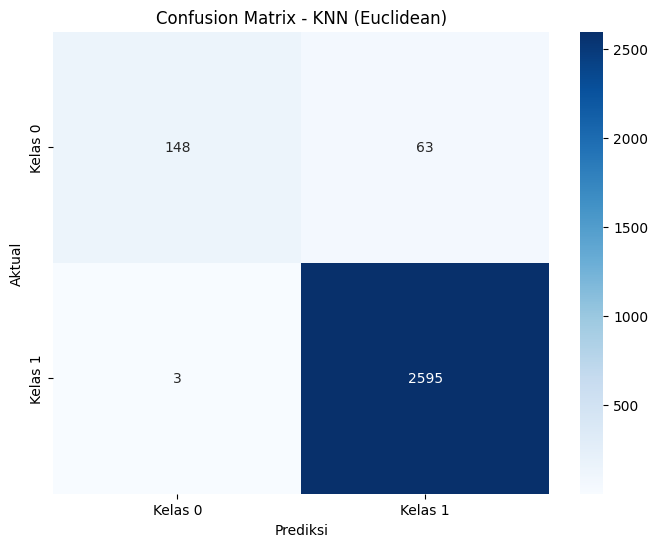

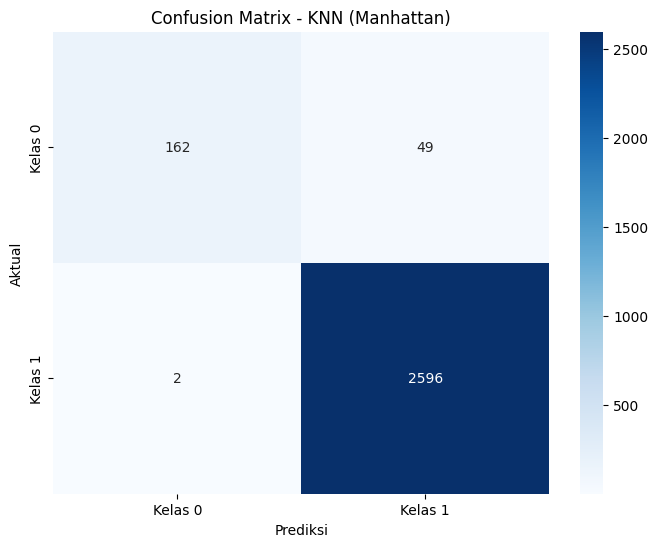

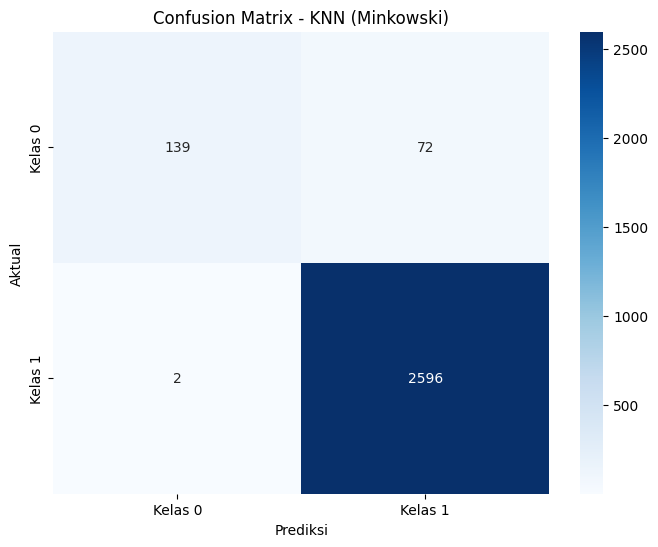

In [30]:
# Membuat confusion matrix
cm_euclidean = confusion_matrix(y_val, y_val_pred_euclidean)
cm_manhattan = confusion_matrix(y_val, y_val_pred_manhattan)
cm_minkowski = confusion_matrix(y_val, y_val_pred_minkowski)

# Menampilkan confusion matrix untuk Euclidean menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_euclidean, annot=True, fmt='d', cmap='Blues', xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN (Euclidean)')
plt.show()

# Menampilkan confusion matrix untuk Manhattan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_manhattan, annot=True, fmt='d', cmap='Blues', xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN (Manhattan)')
plt.show()

# Menampilkan confusion matrix untuk Minkowski menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_minkowski, annot=True, fmt='d', cmap='Blues', xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN (Minkowski)')
plt.show()


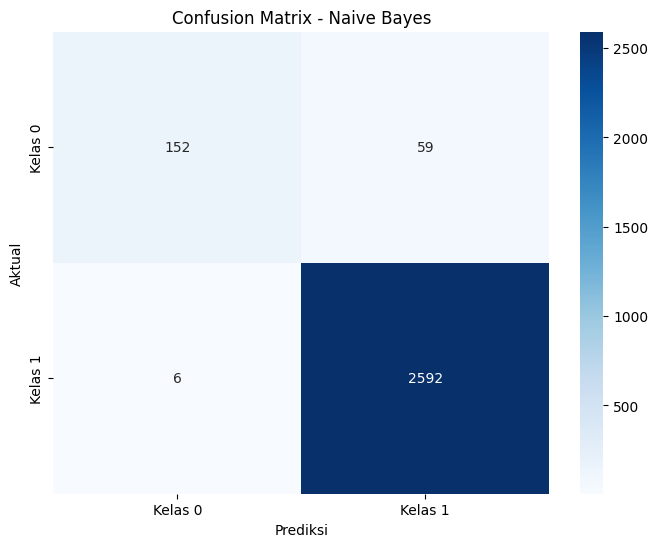

In [33]:
# Membuat confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

"""
### Analisis Confusion Matrix

1. **Definisi:**
   - **True Positive (TP):** Model memprediksi positif, dan data sebenarnya positif.
   - **True Negative (TN):** Model memprediksi negatif, dan data sebenarnya negatif.
   - **False Positive (FP):** Model memprediksi positif, padahal data sebenarnya negatif (Type I Error).
   - **False Negative (FN):** Model memprediksi negatif, padahal data sebenarnya positif (Type II Error).

2. **Hasil Analisis Berdasarkan Confusion Matrix:**
   - **KNN Euclidean:** TN = 148, TP = 2595, FP = 63, FN = 3.
   - **KNN Manhattan:** TN = 162, TP = 2596, FP = 49, FN = 2.
   - **KNN Minkowski:** TN = 139, TP = 2596, FP = 72, FN = 2.
   - **KNN GNB:** TN = 152, TP = 2592, FP = 59, FN = 6.

3. **Kesimpulan:**
   - **KNN Manhattan adalah model terbaik secara keseluruhan:**
     - Memiliki TN dan TP tertinggi (162 dan 2596).
     - Memiliki FP dan FN terendah (49 dan 2).
   - **False Positive (FP) masih tergolong tinggi** pada KNN Minkowski (72) dan Euclidean (63).
     - Model cenderung sering salah memprediksi data negatif (Kelas 0) menjadi positif (Kelas 1).

4. **Rekomendasi Improvement:**
   Untuk meningkatkan akurasi prediksi dan mengurangi False Positives, berikut adalah langkah-langkah yang dapat dilakukan:
   - **Imbalance Handling:** Terapkan metode seperti oversampling (SMOTE) atau undersampling untuk menangani distribusi data yang tidak seimbang.
   - **Penambahan Data Latih:** Tambahkan data latih, terutama untuk kelas yang sulit dikenali.
   - **Model Ensembling:** Gabungkan beberapa model (misalnya, KNN dengan Decision Tree atau Random Forest) untuk meningkatkan performa prediksi.
"""

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [19]:
# Load data test
df_test = pd.read_csv('./test.csv')
X_test = df_test.copy()


#Fitur yang dipilih
numerical_columns = ['DegitRatioInURL', 'SpacialCharRatioInURL', 'NoOfOtherSpecialCharsInURL', 'DomainTitleMatchScore', 'CharContinuationRate', 'URLCharProb']
categorical_columns = ['IsHTTPS', 'HasTitle', 'HasSocialNet', 'HasCopyrightInfo']

# Pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            # remove duplicate
            ('duplicate_remover', DuplicateRemover(axis=0))
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
            # remove duplicate
            ('duplicate_remover', DuplicateRemover(axis=1))
            
        ]), categorical_columns)
    ]
)


pipeline = Pipeline([
    ('preprocessor', preprocessor)
])
# Preprocessing data
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed).apply(pd.to_numeric, errors='coerce').to_numpy()

X_val_transformed = pipeline.transform(X_val)
X_val_transformed = pd.DataFrame(X_val_transformed).apply(pd.to_numeric, errors='coerce').to_numpy()

X_test_transformed = pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed).apply(pd.to_numeric, errors='coerce').to_numpy()

# Load saved model
gnb = SaveModelLoader.load('gnb.pkl')

# Predict on validation data
y_val_pred = gnb.predict(X_val_transformed)
accuracy = np.mean(y_val_pred == y_val)
print(f"Akurasi Gaussian Naive Bayes pada data validasi: {accuracy:.2f}")

# Prediksi pada data validasi
y_val_pred = gnb.predict(X_val_transformed)
accuracy = gnb.score(X_val_transformed, y_val)
print(f"Akurasi dengan Manhattan distance: {accuracy}")

# Laporan performa
print(classification_report(y_val, y_val_pred))
f1_macro = f1_score(y_val, y_val_pred, average='macro')
print(f"F1 Score (Macro Average) on Validation Set: {f1_macro}")

# Prediksi pada data test
y_test_pred = gnb.predict(X_test_transformed)

# Menyusun hasil submission
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Menggunakan ID dari df_test
    'label': y_test_pred  # Label hasil prediksi
})

# Simpan hasil submission
submission_filepath = 'submission_result.csv'
submission_df.to_csv(submission_filepath, index=False)
print(f"Submission result saved to: {submission_filepath}")


Model successfully loaded from pkl/gnb.pkl


/var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/ipykernel_88979/2539192493.py:36: RuntimeWarning: divide by zero encountered in log
  likelihoods = np.sum(np.log(self._calculate_likelihood(idx, x)))


Akurasi Gaussian Naive Bayes pada data validasi: 0.97
Akurasi dengan Manhattan distance: 0.9722232114240946
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      2111
           1       0.98      0.99      0.99     25970

    accuracy                           0.97     28081
   macro avg       0.94      0.85      0.89     28081
weighted avg       0.97      0.97      0.97     28081

F1 Score (Macro Average) on Validation Set: 0.8899739753392629
Submission result saved to: submission_result.csv


/var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/ipykernel_88979/2539192493.py:36: RuntimeWarning: divide by zero encountered in log
  likelihoods = np.sum(np.log(self._calculate_likelihood(idx, x)))


In [ ]:
# Load data test
df_test = pd.read_csv('./test.csv')
X_test = df_test.copy()

# # Definisi kolom numerik dan kategorikal
# numerical_columns = ['IsHTTPS', 'HasTitle', 'DegitRatioInURL', 'HasSocialNet', 'HasCopyrightInfo', 'SpacialCharRatioInURL', 'HasDescription']
# categorical_columns = []

# Pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            # use imputer to fill missing values with median
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            
            
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
            
        ]), categorical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Preprocessing data
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

X_val_transformed = pipeline.transform(X_val)
X_val_transformed = pd.DataFrame(X_val_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

X_test_transformed = pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Pastikan semua data numerik
X_train_transformed = X_train_transformed.apply(pd.to_numeric, errors='coerce')
X_val_transformed = X_val_transformed.apply(pd.to_numeric, errors='coerce')
X_test_transformed = X_test_transformed.apply(pd.to_numeric, errors='coerce')

# Definisi KNN model
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_euclidean.fit(X_train_transformed, y_train)


# Prediksi pada data validasi
y_val_pred = knn_euclidean.predict(X_val_transformed)
accuracy_euclidean = knn_euclidean.score(X_val_transformed, y_val)
print(f"Akurasi dengan Manhattan distance: {accuracy_euclidean}")

# Laporan performa
print(classification_report(y_val, y_val_pred))
f1_macro = f1_score(y_val, y_val_pred, average='macro')
print(f"F1 Score (Macro Average) on Validation Set: {f1_macro}")

# Prediksi pada data test
y_test_pred = knn_euclidean.predict(X_test_transformed)

# Menyusun hasil submission
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Menggunakan ID dari df_test
    'label': y_test_pred  # Label hasil prediksi
})

# Simpan hasil submission
submission_filepath = 'submission_result.csv'
submission_df.to_csv(submission_filepath, index=False)
print(f"Submission result saved to: {submission_filepath}")


Akurasi dengan Euclidean distance: 0.9834407606566717
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2111
           1       0.98      1.00      0.99     25970

    accuracy                           0.98     28081
   macro avg       0.98      0.90      0.93     28081
weighted avg       0.98      0.98      0.98     28081

F1 Score (Macro Average) on Validation Set: 0.9346148412144676
Submission result saved to: submission_result.csv


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

- Ya, model lebih baik dalam memprediksi kelas positif (Kelas 1) karena distribusi data tidak seimbang (Kelas 1 lebih dominan) dan fitur lebih relevan untuk kelas positif.
- KNN Manhattan adalah yang terbaik karena memiliki TP tertinggi (2596) dan FP serta FN terendah (49 dan 2). Manhattan Distance lebih stabil terhadap outlier dibanding metode jarak lainnya.
- Imputasi lebih baik karena menghapus data dapat mengurangi jumlah data signifikan, terutama dalam dataset dengan distribusi tidak seimbang.
- Ya, scaling fitur meningkatkan akurasi model, terutama KNN, karena membuat perhitungan jarak lebih konsisten antar fitur.
